In [1]:
import xarray as xr
# import xesmf as xe
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
import statsmodels.api as sm
import cartopy
import cartopy.util
import cartopy.crs as ccrs
import glob
import sys
import datetime

In [2]:
run ../util/setupConsole

In [3]:
cesm2_hist_tx_phsoff = xr.open_dataset('clm5/clm50_cesm201R_1deg_GSWP3V1_phsoff_hist.clm2.h0.TREFMXAV.185001-201412.nc')
clm5_hist_tx_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.TREFMXAV.185001-201012.nc')
clm5_hist_tx_nocrop = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist_nocrop_transientfix.clm2.h0.TREFMXAV.185001-201012.nc')
clm5_hist_tx_noirr = xr.open_dataset('clm5/clm50_r270_1deg_GSWP3V1_NoIrrig_hist.clm2.h0.TREFMXAV.185001-201012.nc')
clm5_hist_tx_nolulcc = xr.open_dataset('clm5/clm50_r270_1deg_GSWP3V1_NoLULCC_hist.clm2.h0.TREFMXAV.185001-201012.nc')

clm5_hist_tw_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.WBT.185001-201012.nc')
clm5_hist_tw_nocrop = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist_nocrop_transientfix.clm2.h0.WBT.185001-201012.nc')

clm5_hist_q2m_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.Q2M.185001-201012.nc')
clm5_hist_q2m_nocrop = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist_nocrop_transientfix.clm2.h0.Q2M.185001-201012.nc')

clm5_hist_lh_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.EFLX_LH_TOT.185001-201012.nc')
clm5_hist_lh_nocrop = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist_nocrop_transientfix.clm2.h0.EFLX_LH_TOT.185001-201012.nc')

clm5_hist_cropprod_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.CROPPROD1C.185001-201012.nc')
clm5_hist_cropprod_nocrop = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist_nocrop_transientfix.clm2.h0.CROPPROD1C.185001-201012.nc')

clm5_hist_fctr_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.FCTR.185001-201012.nc')
clm5_hist_fcev_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.FCEV.185001-201012.nc')
clm5_hist_fgev_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.FGEV.185001-201012.nc')

clm5_hist_qvege_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.QVEGE.185001-201012.nc')
clm5_hist_qvegt_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.QVEGT.185001-201012.nc')
clm5_hist_qflxtot_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.QFLX_EVAP_TOT.185001-201012.nc')

clm5_hist_qh2osfc_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.QH2OSFC.185001-201012.nc')
clm5_hist_qh2osfc_nocrop = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist_nocrop_transientfix.clm2.h0.QH2OSFC.185001-201012.nc')

clm5_hist_soilwater10cm_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.SOILWATER_10CM.185001-201012.nc')
clm5_hist_soilwater10cm_nocrop = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist_nocrop_transientfix.clm2.h0.SOILWATER_10CM.185001-201012.nc')

cesm2_hist_tn_phsoff = xr.open_dataset('clm5/clm50_cesm201R_1deg_GSWP3V1_phsoff_hist.clm2.h0.TREFMNAV.185001-201412.nc')
clm5_hist_tn_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.TREFMNAV.185001-201012.nc')
clm5_hist_tn_nocrop = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist_nocrop_transientfix.clm2.h0.TREFMNAV.185001-201012.nc')
clm5_hist_tn_noirr = xr.open_dataset('clm5/clm50_r270_1deg_GSWP3V1_NoIrrig_hist.clm2.h0.TREFMNAV.185001-201012.nc')
clm5_hist_tn_nolulcc = xr.open_dataset('clm5/clm50_r270_1deg_GSWP3V1_NoLULCC_hist.clm2.h0.TREFMNAV.185001-201012.nc')

In [4]:
cesm2_hist_tx_phsoff.load()
clm5_hist_tx_iso.load()
clm5_hist_tx_nocrop.load()
clm5_hist_tx_noirr.load()
clm5_hist_tx_nolulcc.load()

clm5_hist_tw_iso.load()
clm5_hist_tw_nocrop.load()

clm5_hist_q2m_iso.load()
clm5_hist_q2m_nocrop.load()

clm5_hist_lh_iso.load()
clm5_hist_lh_nocrop.load()

clm5_hist_cropprod_iso.load()
clm5_hist_cropprod_nocrop.load()

clm5_hist_fctr_iso.load()
clm5_hist_fcev_iso.load()
clm5_hist_fgev_iso.load()

clm5_hist_qvege_iso.load()
clm5_hist_qvegt_iso.load()
clm5_hist_qflxtot_iso.load()

clm5_hist_qh2osfc_iso.load()
clm5_hist_qh2osfc_nocrop.load()

clm5_hist_soilwater10cm_iso.load()
clm5_hist_soilwater10cm_nocrop.load()

cesm2_hist_tn_phsoff.load()
clm5_hist_tn_iso.load()
clm5_hist_tn_nocrop.load()
clm5_hist_tn_noirr.load()
clm5_hist_tn_nolulcc.load()

<xarray.Dataset>
Dimensions:       (hist_interval: 2, lat: 192, levdcmp: 25, levgrnd: 25, levlak: 10, lon: 288, time: 1932)
Coordinates:
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.325 44.775
  * levdcmp       (levdcmp) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * lon           (lon) float32 0.0 1.25 2.5 3.75 ... 355.0 356.25 357.5 358.75
  * lat           (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
  * time          (time) object 1850-02-01 00:00:00 ... 2011-01-01 00:00:00
Dimensions without coordinates: hist_interval
Data variables:
    area          (lat, lon) float32 29.948368 29.948368 29.948368 ... nan nan
    landfrac      (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... nan nan nan nan nan
    landmask      (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    pftmask       (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    nbedrock      (lat, lon) float64 20.0 20.0 20.0 20.0 ... 0.0 0.0 0.0 0.0
    ZSOI          (levgrnd, lat, lon) float32 0.01 0.01 0.01 ... nan nan nan
    DZSOI         (levgrnd, lat, lon) float32 0.02 0.02 0.02 ... nan nan nan
    WATSAT        (levgrnd, lat, lon) float32 nan nan nan nan ... nan nan nan
    SUCSAT        (levgrnd, lat, lon) float32 nan nan nan nan ... nan nan nan
    BSW           (levgrnd, lat, lon) float32 nan nan nan nan ... nan nan nan
    HKSAT         (levgrnd, lat, lon) float32 nan nan nan nan ... nan nan nan
    ZLAKE         (levlak, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    DZLAKE        (levlak, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    mcdate        (time) float64 1.85e+07 1.85e+07 ... 2.01e+07 2.011e+07
    mcsec         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    mdcur         (time) float64 31.0 59.0 90.0 ... 5.87e+04 5.873e+04 5.876e+04
    mscur         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    nstep         (time) float64 1.488e+03 2.832e+03 ... 2.819e+06 2.821e+06
    time_bounds   (time, hist_interval) object 1849-12-31 23:30:00 ... 2011-01-01 00:00:00
    date_written  (time) object b'12/25/17' b'12/25/17' ... b'12/26/17'
    time_written  (time) object b'13:18:48{@\x97\xce{@\x97\xce' ... b'16:14:32\xff\xff\xd8\xf1\xff\xff\xd8\xf1'
    TREFMNAV      (time, lat, lon) float32 242.85622 242.85622 ... nan nan
Attributes:
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 12/25/17 13:18:48
    source:                                    Community Land Model CLM4.0
    hostname:                                  cheyenne
    username:                                  oleson
    version:                                   unknown
    revision_id:                               $Id: histFileMod.F90 42903 201...
    case_title:                                UNSET
    case_id:                                   clm50_r270_1deg_GSWP3V1_NoLULC...
    Surface_dataset:                           surfdata_0.9x1.25_78pfts_CMIP6...
    Initial_conditions_dataset:                finidat_interp_dest.nc
    PFT_physiological_constants_dataset:       clm5_params.c171117.nc
    ltype_vegetated_or_bare_soil:              1
    ltype_crop:                                2
    ltype_UNUSED:                              3
    ltype_landice_multiple_elevation_classes:  4
    ltype_deep_lake:                           5
    ltype_wetland:                             6
    ltype_urban_tbd:                           7
    ltype_urban_hd:                            8
    ltype_urban_md:                            9
    ctype_vegetated_or_bare_soil:              1
    ctype_crop:                                2
    ctype_crop_noncompete:                     2*100

In [3]:
clm5_hist_hourly = xr.open_mfdataset('clm5/hourly/clm50sp_clm50dev001_1deg_GSWP3V1_hist.clm2.h7.TSA.*.nc')
clm5_hist_phsoff_hourly = xr.open_mfdataset('clm5/hourly/clm50sp_clm50dev001_1deg_GSWP3V1_phsoff_hist.clm2.h7.TSA.*.nc')

In [4]:
clm5_hist_phsoff_hourly

<xarray.Dataset>
Dimensions:       (hist_interval: 2, lat: 192, levdcmp: 1, levgrnd: 25, levlak: 10, lon: 288, time: 87601)
Coordinates:
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.325 44.775
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * lat           (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
  * levdcmp       (levdcmp) float32 1.0
  * lon           (lon) float32 0.0 1.25 2.5 3.75 ... 355.0 356.25 357.5 358.75
  * time          (time) object 2005-01-01 00:00:00 ... 2015-01-01 00:00:00
Dimensions without coordinates: hist_interval
Data variables:
    area          (time, lat, lon) float32 dask.array<chunksize=(8760, 192, 288), meta=np.ndarray>
    landfrac      (time, lat, lon) float32 dask.array<chunksize=(8760, 192, 288), meta=np.ndarray>
    landmask      (time, lat, lon) float64 dask.array<chunksize=(8760, 192, 288), meta=np.ndarray>
    pftmask       (time, lat, lon) float64 dask.array<chunksize=(8760, 192, 288), meta=np.ndarray>
    nbedrock      (time, lat, lon) float64 dask.array<chunksize=(8760, 192, 288), meta=np.ndarray>
    mcdate        (time) float64 dask.array<chunksize=(8760,), meta=np.ndarray>
    mcsec         (time) float64 dask.array<chunksize=(8760,), meta=np.ndarray>
    mdcur         (time) float64 dask.array<chunksize=(8760,), meta=np.ndarray>
    mscur         (time) float64 dask.array<chunksize=(8760,), meta=np.ndarray>
    nstep         (time) float64 dask.array<chunksize=(8760,), meta=np.ndarray>
    time_bounds   (time, hist_interval) object dask.array<chunksize=(8760, 2), meta=np.ndarray>
    date_written  (time) object dask.array<chunksize=(8760,), meta=np.ndarray>
    time_written  (time) object dask.array<chunksize=(8760,), meta=np.ndarray>
    TSA           (time, lat, lon) float32 dask.array<chunksize=(8760, 192, 288), meta=np.ndarray>
Attributes:
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 04/08/18 19:48:40
    source:                                    Community Land Model CLM4.0
    hostname:                                  cheyenne
    username:                                  oleson
    version:                                   unknown
    revision_id:                               $Id: histFileMod.F90 42903 201...
    case_title:                                UNSET
    case_id:                                   clm50sp_clm50dev001_1deg_GSWP3...
    Surface_dataset:                           surfdata_0.9x1.25_16pfts_Irrig...
    Initial_conditions_dataset:                clm50sp_clm50dev001_1deg_GSWP3...
    PFT_physiological_constants_dataset:       clm5_params.c171117.nc
    ltype_vegetated_or_bare_soil:              1
    ltype_crop:                                2
    ltype_UNUSED:                              3
    ltype_landice_multiple_elevation_classes:  4
    ltype_deep_lake:                           5
    ltype_wetland:                             6
    ltype_urban_tbd:                           7
    ltype_urban_hd:                            8
    ltype_urban_md:                            9
    ctype_vegetated_or_bare_soil:              1
    ctype_crop:                                2
    ctype_crop_noncompete:                     2*100+m, m=cft_lb,cft_ub
    ctype_landice:                             3
    ctype_landice_multiple_elevation_classes:  4*100+m, m=1,glcnec
    ctype_deep_lake:                           5
    ctype_wetland:                             6
    ctype_urban_roof:                          71
    ctype_urban_sunwall:                       72
    ctype_urban_shadewall:                     73
    ctype_urban_impervious_road:               74
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irr

In [6]:
clm5_hist_hourly.load()
clm5_hist_phsoff_hourly.load()

<xarray.Dataset>
Dimensions:       (hist_interval: 2, lat: 192, levdcmp: 1, levgrnd: 25, levlak: 10, lon: 288, time: 87601)
Coordinates:
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.325 44.775
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * lat           (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
  * levdcmp       (levdcmp) float32 1.0
  * lon           (lon) float32 0.0 1.25 2.5 3.75 ... 355.0 356.25 357.5 358.75
  * time          (time) object 2005-01-01 00:00:00 ... 2015-01-01 00:00:00
Dimensions without coordinates: hist_interval
Data variables:
    area          (time, lat, lon) float32 29.948368 29.948368 ... nan nan
    landfrac      (time, lat, lon) float32 1.0 1.0 1.0 1.0 ... nan nan nan nan
    landmask      (time, lat, lon) float64 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    pftmask       (time, lat, lon) float64 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    nbedrock      (time, lat, lon) float64 20.0 20.0 20.0 20.0 ... 0.0 0.0 0.0
    mcdate        (time) float64 2.005e+07 2.005e+07 ... 2.014e+07 2.015e+07
    mcsec         (time) float64 0.0 3.6e+03 7.2e+03 ... 7.92e+04 8.28e+04 0.0
    mdcur         (time) float64 0.0 0.0 0.0 ... 3.649e+03 3.649e+03 3.65e+03
    mscur         (time) float64 0.0 3.6e+03 7.2e+03 ... 7.92e+04 8.28e+04 0.0
    nstep         (time) float64 0.0 2.0 4.0 ... 1.752e+05 1.752e+05 1.752e+05
    time_bounds   (time, hist_interval) object 2004-12-31 23:30:00 ... 2015-01-01 00:00:00
    date_written  (time) object b'04/08/18' b'04/08/18' ... b'04/08/18'
    time_written  (time) object b'19:48:40' ... b'23:32:42\xff\xff\xd8\xf1\xff\xff\xd8\xf1'
    TSA           (time, lat, lon) float32 252.97153 252.97153 ... nan nan
Attributes:
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 04/08/18 19:48:40
    source:                                    Community Land Model CLM4.0
    hostname:                                  cheyenne
    username:                                  oleson
    version:                                   unknown
    revision_id:                               $Id: histFileMod.F90 42903 201...
    case_title:                                UNSET
    case_id:                                   clm50sp_clm50dev001_1deg_GSWP3...
    Surface_dataset:                           surfdata_0.9x1.25_16pfts_Irrig...
    Initial_conditions_dataset:                clm50sp_clm50dev001_1deg_GSWP3...
    PFT_physiological_constants_dataset:       clm5_params.c171117.nc
    ltype_vegetated_or_bare_soil:              1
    ltype_crop:                                2
    ltype_UNUSED:                              3
    ltype_landice_multiple_elevation_classes:  4
    ltype_deep_lake:                           5
    ltype_wetland:                             6
    ltype_urban_tbd:                           7
    ltype_urban_hd:                            8
    ltype_urban_md:                            9
    ctype_vegetated_or_bare_soil:              1
    ctype_crop:                                2
    ctype_crop_noncompete:                     2*100+m, m=cft_lb,cft_ub
    ctype_landice:                             3
    ctype_landice_multiple_elevation_classes:  4*100+m, m=1,glcnec
    ctype_deep_lake:                           5
    ctype_wetland:                             6
    ctype_urban_roof:                          71
    ctype_urban_sunwall:                       72
    ctype_urban_shadewall:                     73
    ctype_urban_impervious_road:               74
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          hour_1

In [9]:
clm5_hist_hourly_max = clm5_hist_hourly.resample(time='1Y').max()
clm5_hist_phsoff_hourly_max = clm5_hist_phsoff_hourly.resample(time='1Y').max()

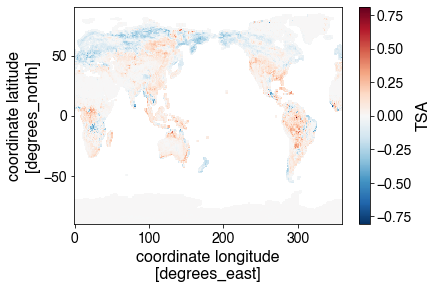

In [13]:
(clm5_hist_hourly_max.TSA.mean(dim='time') - clm5_hist_phsoff_hourly_max.TSA.mean(dim='time')).plot()

In [17]:
lat_vals = clm5_hist_tx_iso.lat.values
lon_vals = clm5_hist_tx_iso.lon.values

lat_ind_midwest =  np.where((clm5_hist_tx_iso.lat.values > 40) & (clm5_hist_tx_iso.lat.values < 45))[0]
lon_ind_midwest =  np.where((clm5_hist_tx_iso.lon.values > 260) & (clm5_hist_tx_iso.lon.values < 270))[0]

lat_ind_wus =  np.where((clm5_hist_tx_iso.lat.values > 40) & (clm5_hist_tx_iso.lat.values < 45))[0]
lon_ind_wus =  np.where((clm5_hist_tx_iso.lon.values > 245) & (clm5_hist_tx_iso.lon.values < 260))[0]

lat_ind_india =  np.where((clm5_hist_tx_iso.lat.values > 20) & (clm5_hist_tx_iso.lat.values < 30))[0]
lon_ind_india =  np.where((clm5_hist_tx_iso.lon.values > 69) & (clm5_hist_tx_iso.lon.values < 89))[0]

lat_ind_eeurope =  np.where((clm5_hist_tx_iso.lat.values > 46) & (clm5_hist_tx_iso.lat.values < 52))[0]
lon_ind_eeurope =  np.where((clm5_hist_tx_iso.lon.values > 24) & (clm5_hist_tx_iso.lon.values < 40))[0]

In [7]:
tx_grid_hist = np.full([clm5_hist_tx_iso.lat.shape[0], clm5_hist_tx_iso.lon.shape[0], 61, 12], np.nan)
tx_grid_hist_nocrop = np.full([clm5_hist_tx_nocrop.lat.shape[0], clm5_hist_tx_nocrop.lon.shape[0], 61, 12], np.nan)
tx_grid_hist_noirr = np.full([clm5_hist_tx_nocrop.lat.shape[0], clm5_hist_tx_nocrop.lon.shape[0], 61, 12], np.nan)
tx_grid_hist_nolulcc = np.full([clm5_hist_tx_nolulcc.lat.shape[0], clm5_hist_tx_nolulcc.lon.shape[0], 61, 12], np.nan)
tx_grid_hist_phsoff = np.full([cesm2_hist_tx_phsoff.lat.shape[0], cesm2_hist_tx_phsoff.lon.shape[0], 61, 12], np.nan)

tw_grid_hist = np.full([clm5_hist_tw_iso.lat.shape[0], clm5_hist_tx_iso.lon.shape[0], 61, 12], np.nan)
tw_grid_hist_nocrop = np.full([clm5_hist_tw_nocrop.lat.shape[0], clm5_hist_tx_nocrop.lon.shape[0], 61, 12], np.nan)

q2m_grid_hist = np.full([clm5_hist_q2m_iso.lat.shape[0], clm5_hist_q2m_iso.lon.shape[0], 61, 12], np.nan)
q2m_grid_hist_nocrop = np.full([clm5_hist_q2m_nocrop.lat.shape[0], clm5_hist_q2m_nocrop.lon.shape[0], 61, 12], np.nan)

lh_grid_hist = np.full([clm5_hist_lh_iso.lat.shape[0], clm5_hist_lh_iso.lon.shape[0], 61, 12], np.nan)
lh_grid_hist_nocrop = np.full([clm5_hist_lh_nocrop.lat.shape[0], clm5_hist_lh_nocrop.lon.shape[0], 61, 12], np.nan)

cropprod_grid_hist = np.full([clm5_hist_cropprod_iso.lat.shape[0], clm5_hist_cropprod_iso.lon.shape[0], 61, 12], np.nan)
cropprod_grid_hist_nocrop = np.full([clm5_hist_cropprod_nocrop.lat.shape[0], clm5_hist_cropprod_nocrop.lon.shape[0], 61, 12], np.nan)

lh_grid_hist = np.full([clm5_hist_lh_iso.lat.shape[0], clm5_hist_lh_iso.lon.shape[0], 61, 12], np.nan)
lh_grid_hist_nocrop = np.full([clm5_hist_lh_nocrop.lat.shape[0], clm5_hist_lh_nocrop.lon.shape[0], 61, 12], np.nan)

fctr_grid_hist = np.full([clm5_hist_fctr_iso.lat.shape[0], clm5_hist_fctr_iso.lon.shape[0], 61, 12], np.nan)
fcev_grid_hist = np.full([clm5_hist_fcev_iso.lat.shape[0], clm5_hist_fcev_iso.lon.shape[0], 61, 12], np.nan)
fgev_grid_hist = np.full([clm5_hist_fgev_iso.lat.shape[0], clm5_hist_fgev_iso.lon.shape[0], 61, 12], np.nan)

qvege_grid_hist = np.full([clm5_hist_qvege_iso.lat.shape[0], clm5_hist_qvege_iso.lon.shape[0], 61, 12], np.nan)
qvegt_grid_hist = np.full([clm5_hist_qvegt_iso.lat.shape[0], clm5_hist_qvegt_iso.lon.shape[0], 61, 12], np.nan)
qflxtot_grid_hist = np.full([clm5_hist_qflxtot_iso.lat.shape[0], clm5_hist_qflxtot_iso.lon.shape[0], 61, 12], np.nan)

qh2osfc_grid_hist = np.full([clm5_hist_qh2osfc_iso.lat.shape[0], clm5_hist_qh2osfc_iso.lon.shape[0], 61, 12], np.nan)
qh2osfc_grid_hist_nocrop = np.full([clm5_hist_qh2osfc_nocrop.lat.shape[0], clm5_hist_qh2osfc_nocrop.lon.shape[0], 61, 12], np.nan)

soilwater10cm_grid_hist = np.full([clm5_hist_soilwater10cm_iso.lat.shape[0], clm5_hist_soilwater10cm_iso.lon.shape[0], 61, 12], np.nan)
soilwater10cm_grid_hist_nocrop = np.full([clm5_hist_soilwater10cm_nocrop.lat.shape[0], clm5_hist_soilwater10cm_nocrop.lon.shape[0], 61, 12], np.nan)

tn_grid_hist = np.full([clm5_hist_tn_iso.lat.shape[0], clm5_hist_tn_iso.lon.shape[0], 61, 12], np.nan)
tn_grid_hist_nocrop = np.full([clm5_hist_tn_nocrop.lat.shape[0], clm5_hist_tn_nocrop.lon.shape[0], 61, 12], np.nan)
tn_grid_hist_noirr = np.full([clm5_hist_tn_noirr.lat.shape[0], clm5_hist_tn_noirr.lon.shape[0], 61, 12], np.nan)
tn_grid_hist_nolulcc = np.full([clm5_hist_tn_nolulcc.lat.shape[0], clm5_hist_tn_nolulcc.lon.shape[0], 61, 12], np.nan)
tn_grid_hist_phsoff = np.full([cesm2_hist_tn_phsoff.lat.shape[0], cesm2_hist_tn_phsoff.lon.shape[0], 61, 12], np.nan)

In [8]:
for m in range(1,12+1):
    time_ind_hist = np.where((clm5_hist_tx_iso['time.month'].values == m) & (clm5_hist_tx_iso['time.year'].values>=1950))[0]
    time_ind_hist = time_ind_hist[0:61]
    
    tx_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_tx_iso.TREFMXAV.values[time_ind_hist,:,:], 0, 2)
    tx_grid_hist_nocrop[:,:,:,m-1] = np.moveaxis(clm5_hist_tx_nocrop.TREFMXAV.values[time_ind_hist,:,:], 0, 2)
    tx_grid_hist_noirr[:,:,:,m-1] = np.moveaxis(clm5_hist_tx_noirr.TREFMXAV.values[time_ind_hist,:,:], 0, 2)
    tx_grid_hist_nolulcc[:,:,:,m-1] = np.moveaxis(clm5_hist_tx_nolulcc.TREFMXAV.values[time_ind_hist,:,:], 0, 2)
    
    tw_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_tw_iso.WBT.values[time_ind_hist,:,:], 0, 2)
    tw_grid_hist_nocrop[:,:,:,m-1] = np.moveaxis(clm5_hist_tw_nocrop.WBT.values[time_ind_hist,:,:], 0, 2)
    
    q2m_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_q2m_iso.Q2M.values[time_ind_hist,:,:], 0, 2)
    q2m_grid_hist_nocrop[:,:,:,m-1] = np.moveaxis(clm5_hist_q2m_nocrop.Q2M.values[time_ind_hist,:,:], 0, 2)
    
    lh_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_lh_iso.EFLX_LH_TOT.values[time_ind_hist,:,:], 0, 2)
    lh_grid_hist_nocrop[:,:,:,m-1] = np.moveaxis(clm5_hist_lh_nocrop.EFLX_LH_TOT.values[time_ind_hist,:,:], 0, 2)
    
    cropprod_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_cropprod_iso.CROPPROD1C.values[time_ind_hist,:,:], 0, 2)
    cropprod_grid_hist_nocrop[:,:,:,m-1] = np.moveaxis(clm5_hist_cropprod_nocrop.CROPPROD1C.values[time_ind_hist,:,:], 0, 2)
    
    fctr_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_fctr_iso.FCTR.values[time_ind_hist,:,:], 0, 2)
    fcev_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_fcev_iso.FCEV.values[time_ind_hist,:,:], 0, 2)
    fgev_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_fgev_iso.FGEV.values[time_ind_hist,:,:], 0, 2)
    
    qvege_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_qvege_iso.QVEGE.values[time_ind_hist,:,:], 0, 2)
    qvegt_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_qvegt_iso.QVEGT.values[time_ind_hist,:,:], 0, 2)
    qflxtot_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_qflxtot_iso.QFLX_EVAP_TOT.values[time_ind_hist,:,:], 0, 2)
    
    qh2osfc_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_qh2osfc_iso.QH2OSFC.values[time_ind_hist,:,:], 0, 2)
    qh2osfc_grid_hist_nocrop[:,:,:,m-1] = np.moveaxis(clm5_hist_qh2osfc_nocrop.QH2OSFC.values[time_ind_hist,:,:], 0, 2)
    
    soilwater10cm_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_soilwater10cm_iso.SOILWATER_10CM.values[time_ind_hist,:,:], 0, 2)
    soilwater10cm_grid_hist_nocrop[:,:,:,m-1] = np.moveaxis(clm5_hist_soilwater10cm_nocrop.SOILWATER_10CM.values[time_ind_hist,:,:], 0, 2)
    
    tn_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_tn_iso.TREFMNAV.values[time_ind_hist,:,:], 0, 2)
    tn_grid_hist_nocrop[:,:,:,m-1] = np.moveaxis(clm5_hist_tn_nocrop.TREFMNAV.values[time_ind_hist,:,:], 0, 2)
    tn_grid_hist_noirr[:,:,:,m-1] = np.moveaxis(clm5_hist_tn_noirr.TREFMNAV.values[time_ind_hist,:,:], 0, 2)
    tn_grid_hist_nolulcc[:,:,:,m-1] = np.moveaxis(clm5_hist_tn_nolulcc.TREFMNAV.values[time_ind_hist,:,:], 0, 2)

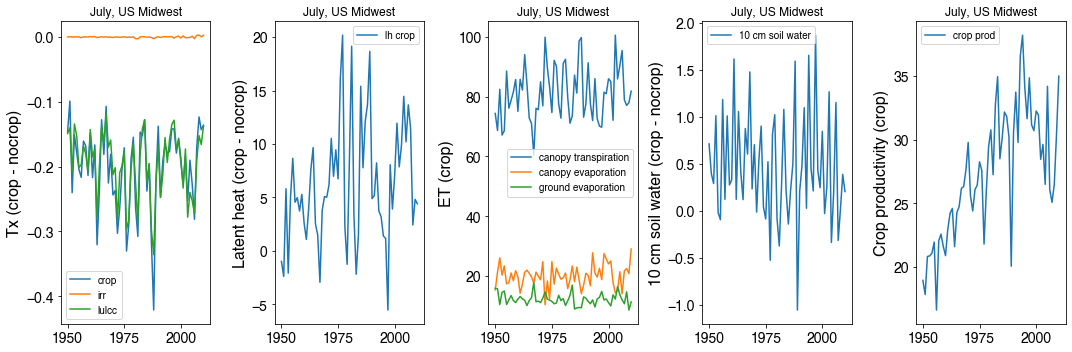

In [15]:
season = np.array([6])

tx_crop_effect_midwest = np.nanmean(np.nanmean(np.nanmean(tx_grid_hist[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(tx_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0)

lh_crop_effect_midwest = np.nanmean(np.nanmean(np.nanmean(lh_grid_hist[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(lh_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0)

tx_irr_effect_midwest = np.nanmean(np.nanmean(np.nanmean(tx_grid_hist[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(tx_grid_hist_noirr[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0)

tx_lulcc_effect_midwest = np.nanmean(np.nanmean(np.nanmean(tx_grid_hist[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(tx_grid_hist_nolulcc[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0)

tx_cropprod_midwest = np.nanmean(np.nanmean(np.nanmean(cropprod_grid_hist[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0)

fctr_cropprod_midwest = np.nanmean(np.nanmean(np.nanmean(fctr_grid_hist[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0)
fcev_cropprod_midwest = np.nanmean(np.nanmean(np.nanmean(fcev_grid_hist[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0)
fgev_cropprod_midwest = np.nanmean(np.nanmean(np.nanmean(fgev_grid_hist[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0)

soilwater10cm_crop_effect_midwest = np.nanmean(np.nanmean(np.nanmean(soilwater10cm_grid_hist[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0) - \
                                        np.nanmean(np.nanmean(np.nanmean(soilwater10cm_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0)

# qh2osfc_crop_effect_midwest = np.nanmean(np.nanmean(np.nanmean(qh2osfc_grid_hist[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0) - \
#                                         np.nanmean(np.nanmean(np.nanmean(qh2osfc_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0)


fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5))
ax[0].plot(range(1950, 1950+61), tx_crop_effect_midwest, label='crop')
ax[0].plot(range(1950, 1950+61), tx_irr_effect_midwest, label='irr')
ax[0].plot(range(1950, 1950+61), tx_lulcc_effect_midwest, label='lulcc')
ax[0].set_ylabel('Tx (crop - nocrop)')
ax[0].set_title('July, US Midwest')
ax[0].legend()

ax[1].plot(range(1950, 1950+61), lh_crop_effect_midwest, label='lh crop')
ax[1].set_title('July, US Midwest')
ax[1].set_ylabel('Latent heat (crop - nocrop)')
ax[1].legend()

ax[2].plot(range(1950, 1950+61), fctr_cropprod_midwest, label='canopy transpiration')
ax[2].plot(range(1950, 1950+61), fcev_cropprod_midwest, label='canopy evaporation')
ax[2].plot(range(1950, 1950+61), fgev_cropprod_midwest, label='ground evaporation')
ax[2].set_ylabel('ET (crop)')
ax[2].set_title('July, US Midwest')
ax[2].legend()

ax[3].plot(range(1950, 1950+61), soilwater10cm_crop_effect_midwest, label='10 cm soil water')
ax[3].set_title('July, US Midwest')
ax[3].set_ylabel('10 cm soil water (crop - nocrop)')
ax[3].legend()

# ax[4].plot(range(1950, 1950+61), qh2osfc_crop_effect_midwest, label='surface runoff')
# ax[4].set_title('July, US Midwest')
# ax[4].set_ylabel('surface runoff (crop - nocrop)')
# ax[4].legend()

ax[4].plot(range(1950, 1950+61), tx_cropprod_midwest, label='crop prod')
ax[4].set_title('July, US Midwest')
ax[4].set_ylabel('Crop productivity (crop)')
ax[4].legend()

plt.tight_layout()

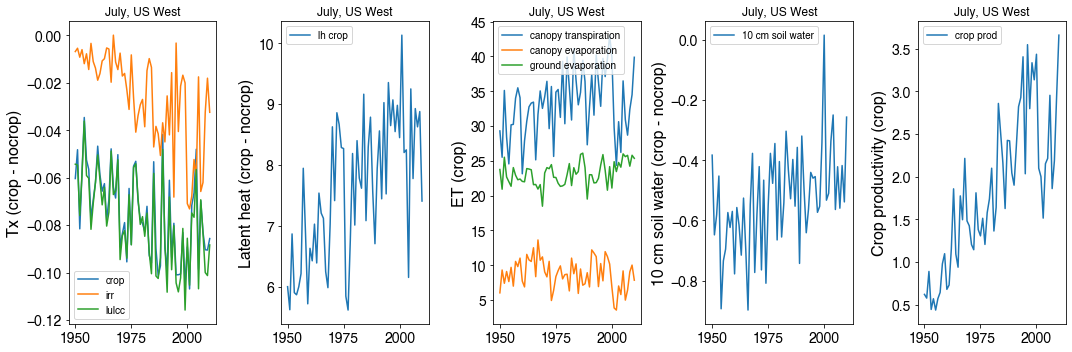

In [19]:
season = np.array([6])

tx_crop_effect_wus = np.nanmean(np.nanmean(np.nanmean(tx_grid_hist[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(tx_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0)

lh_crop_effect_wus = np.nanmean(np.nanmean(np.nanmean(lh_grid_hist[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(lh_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0)

tx_irr_effect_wus = np.nanmean(np.nanmean(np.nanmean(tx_grid_hist[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(tx_grid_hist_noirr[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0)

tx_lulcc_effect_wus = np.nanmean(np.nanmean(np.nanmean(tx_grid_hist[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(tx_grid_hist_nolulcc[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0)

tx_cropprod_wus = np.nanmean(np.nanmean(np.nanmean(cropprod_grid_hist[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0)

fctr_cropprod_wus = np.nanmean(np.nanmean(np.nanmean(fctr_grid_hist[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0)
fcev_cropprod_wus = np.nanmean(np.nanmean(np.nanmean(fcev_grid_hist[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0)
fgev_cropprod_wus = np.nanmean(np.nanmean(np.nanmean(fgev_grid_hist[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0)

soilwater10cm_crop_effect_wus = np.nanmean(np.nanmean(np.nanmean(soilwater10cm_grid_hist[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0) - \
                                        np.nanmean(np.nanmean(np.nanmean(soilwater10cm_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0)

# qh2osfc_crop_effect_wus = np.nanmean(np.nanmean(np.nanmean(qh2osfc_grid_hist[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0) - \
#                                         np.nanmean(np.nanmean(np.nanmean(qh2osfc_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_wus,:,:][:,lon_ind_wus,:], axis=1), axis=0)


fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5))
ax[0].plot(range(1950, 1950+61), tx_crop_effect_wus, label='crop')
ax[0].plot(range(1950, 1950+61), tx_irr_effect_wus, label='irr')
ax[0].plot(range(1950, 1950+61), tx_lulcc_effect_wus, label='lulcc')
ax[0].set_ylabel('Tx (crop - nocrop)')
ax[0].set_title('July, US West')
ax[0].legend()

ax[1].plot(range(1950, 1950+61), lh_crop_effect_wus, label='lh crop')
ax[1].set_title('July, US West')
ax[1].set_ylabel('Latent heat (crop - nocrop)')
ax[1].legend()

ax[2].plot(range(1950, 1950+61), fctr_cropprod_wus, label='canopy transpiration')
ax[2].plot(range(1950, 1950+61), fcev_cropprod_wus, label='canopy evaporation')
ax[2].plot(range(1950, 1950+61), fgev_cropprod_wus, label='ground evaporation')
ax[2].set_ylabel('ET (crop)')
ax[2].set_title('July, US West')
ax[2].legend()

ax[3].plot(range(1950, 1950+61), soilwater10cm_crop_effect_wus, label='10 cm soil water')
ax[3].set_title('July, US West')
ax[3].set_ylabel('10 cm soil water (crop - nocrop)')
ax[3].legend()

# ax[4].plot(range(1950, 1950+61), qh2osfc_crop_effect_wus, label='surface runoff')
# ax[4].set_title('July, US wus')
# ax[4].set_ylabel('surface runoff (crop - nocrop)')
# ax[4].legend()

ax[4].plot(range(1950, 1950+61), tx_cropprod_wus, label='crop prod')
ax[4].set_title('July, US West')
ax[4].set_ylabel('Crop productivity (crop)')
ax[4].legend()

plt.tight_layout()

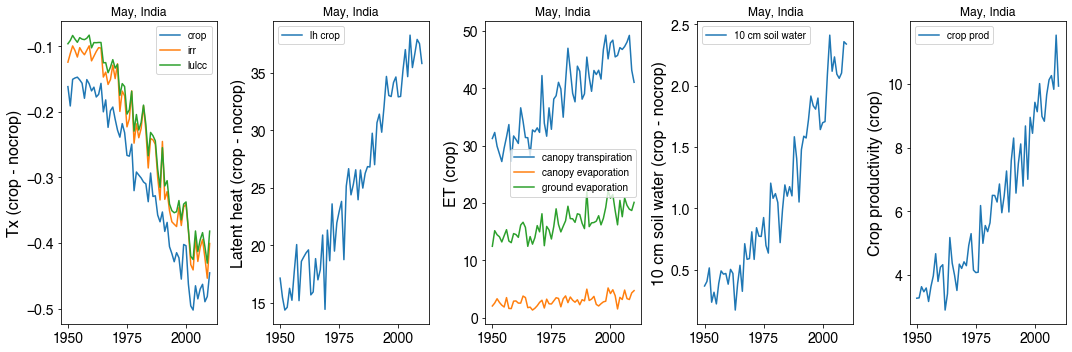

In [10]:
season = np.array([5])


tx_crop_effect_india = np.nanmean(np.nanmean(np.nanmean(tx_grid_hist[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(tx_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0)

lh_crop_effect_india = np.nanmean(np.nanmean(np.nanmean(lh_grid_hist[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(lh_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0)

tx_irr_effect_india = np.nanmean(np.nanmean(np.nanmean(tx_grid_hist[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(tx_grid_hist_noirr[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0)

tx_lulcc_effect_india = np.nanmean(np.nanmean(np.nanmean(tx_grid_hist[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(tx_grid_hist_nolulcc[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0)

tx_cropprod_india = np.nanmean(np.nanmean(np.nanmean(cropprod_grid_hist[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0)

fctr_cropprod_india = np.nanmean(np.nanmean(np.nanmean(fctr_grid_hist[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0)
fcev_cropprod_india = np.nanmean(np.nanmean(np.nanmean(fcev_grid_hist[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0)
fgev_cropprod_india = np.nanmean(np.nanmean(np.nanmean(fgev_grid_hist[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0)

soilwater10cm_crop_effect_india = np.nanmean(np.nanmean(np.nanmean(soilwater10cm_grid_hist[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0) - \
                                        np.nanmean(np.nanmean(np.nanmean(soilwater10cm_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_india,:,:][:,lon_ind_india,:], axis=1), axis=0)

# qh2osfc_crop_effect_india = np.nanmean(np.nanmean(np.nanmean(qh2osfc_grid_hist[:,:,:,season],axis=3)[lat_ind_midwes,:,:][:,lon_ind_midwest,:], axis=1), axis=0) - \
#                                         np.nanmean(np.nanmean(np.nanmean(qh2osfc_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_midwest,:,:][:,lon_ind_midwest,:], axis=1), axis=0)

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5))
ax[0].plot(range(1950, 1950+61), tx_crop_effect_india, label='crop')
ax[0].plot(range(1950, 1950+61), tx_irr_effect_india, label='irr')
ax[0].plot(range(1950, 1950+61), tx_lulcc_effect_india, label='lulcc')
ax[0].set_ylabel('Tx (crop - nocrop)')
ax[0].set_title('May, India')
ax[0].legend()

ax[1].plot(range(1950, 1950+61), lh_crop_effect_india, label='lh crop')
ax[1].set_ylabel('Latent heat (crop - nocrop)')
ax[1].set_title('May, India')
ax[1].legend()

ax[2].plot(range(1950, 1950+61), fctr_cropprod_india, label='canopy transpiration')
ax[2].plot(range(1950, 1950+61), fcev_cropprod_india, label='canopy evaporation')
ax[2].plot(range(1950, 1950+61), fgev_cropprod_india, label='ground evaporation')
ax[2].set_ylabel('ET (crop)')
ax[2].set_title('May, India')
ax[2].legend()

ax[3].plot(range(1950, 1950+61), soilwater10cm_crop_effect_india, label='10 cm soil water')
ax[3].set_title('May, India')
ax[3].set_ylabel('10 cm soil water (crop - nocrop)')
ax[3].legend()

ax[4].plot(range(1950, 1950+61), tx_cropprod_india, label='crop prod')
ax[4].set_ylabel('Crop productivity (crop)')
ax[4].set_title('May, India')
ax[4].legend()

plt.tight_layout()

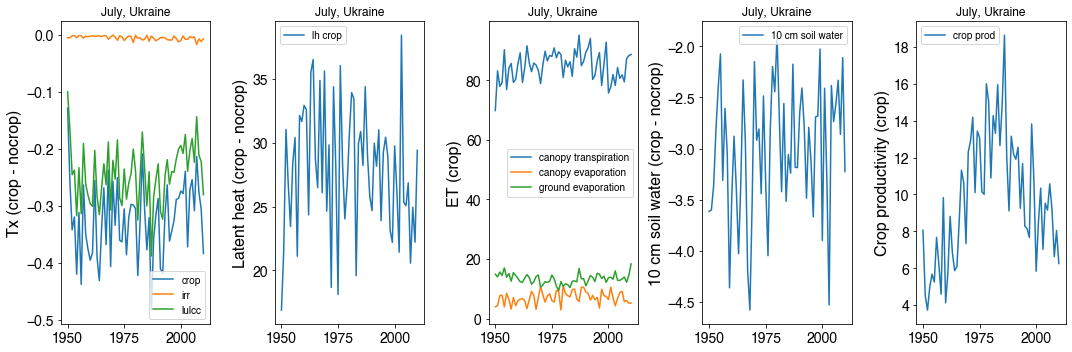

In [11]:
season = np.array([6])


tx_crop_effect_eeurope = np.nanmean(np.nanmean(np.nanmean(tx_grid_hist[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(tx_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0)

lh_crop_effect_eeurope = np.nanmean(np.nanmean(np.nanmean(lh_grid_hist[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(lh_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0)

tx_irr_effect_eeurope = np.nanmean(np.nanmean(np.nanmean(tx_grid_hist[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(tx_grid_hist_noirr[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0)

tx_lulcc_effect_eeurope = np.nanmean(np.nanmean(np.nanmean(tx_grid_hist[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0) - \
                            np.nanmean(np.nanmean(np.nanmean(tx_grid_hist_nolulcc[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0)

tx_cropprod_eeurope = np.nanmean(np.nanmean(np.nanmean(cropprod_grid_hist[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0)

fctr_cropprod_eeurope = np.nanmean(np.nanmean(np.nanmean(fctr_grid_hist[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0)
fcev_cropprod_eeurope = np.nanmean(np.nanmean(np.nanmean(fcev_grid_hist[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0)
fgev_cropprod_eeurope = np.nanmean(np.nanmean(np.nanmean(fgev_grid_hist[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0)

soilwater10cm_crop_effect_eeurope = np.nanmean(np.nanmean(np.nanmean(soilwater10cm_grid_hist[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0) - \
                                        np.nanmean(np.nanmean(np.nanmean(soilwater10cm_grid_hist_nocrop[:,:,:,season],axis=3)[lat_ind_eeurope,:,:][:,lon_ind_eeurope,:], axis=1), axis=0)

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5))
ax[0].plot(range(1950, 1950+61), tx_crop_effect_eeurope, label='crop')
ax[0].plot(range(1950, 1950+61), tx_irr_effect_eeurope, label='irr')
ax[0].plot(range(1950, 1950+61), tx_lulcc_effect_eeurope, label='lulcc')
ax[0].set_ylabel('Tx (crop - nocrop)')
ax[0].set_title('July, Ukraine')
ax[0].legend()

ax[1].plot(range(1950, 1950+61), lh_crop_effect_eeurope, label='lh crop')
ax[1].set_ylabel('Latent heat (crop - nocrop)')
ax[1].set_title('July, Ukraine')
ax[1].legend()

ax[2].plot(range(1950, 1950+61), fctr_cropprod_eeurope, label='canopy transpiration')
ax[2].plot(range(1950, 1950+61), fcev_cropprod_eeurope, label='canopy evaporation')
ax[2].plot(range(1950, 1950+61), fgev_cropprod_eeurope, label='ground evaporation')
ax[2].set_ylabel('ET (crop)')
ax[2].set_title('July, Ukraine')
ax[2].legend()

ax[3].plot(range(1950, 1950+61), soilwater10cm_crop_effect_eeurope, label='10 cm soil water')
ax[3].set_title('July, Ukraine')
ax[3].set_ylabel('10 cm soil water (crop - nocrop)')
ax[3].legend()

ax[4].plot(range(1950, 1950+61), tx_cropprod_eeurope, label='crop prod')
ax[4].set_ylabel('Crop productivity (crop)')
ax[4].set_title('July, Ukraine')
ax[4].legend()

plt.tight_layout()

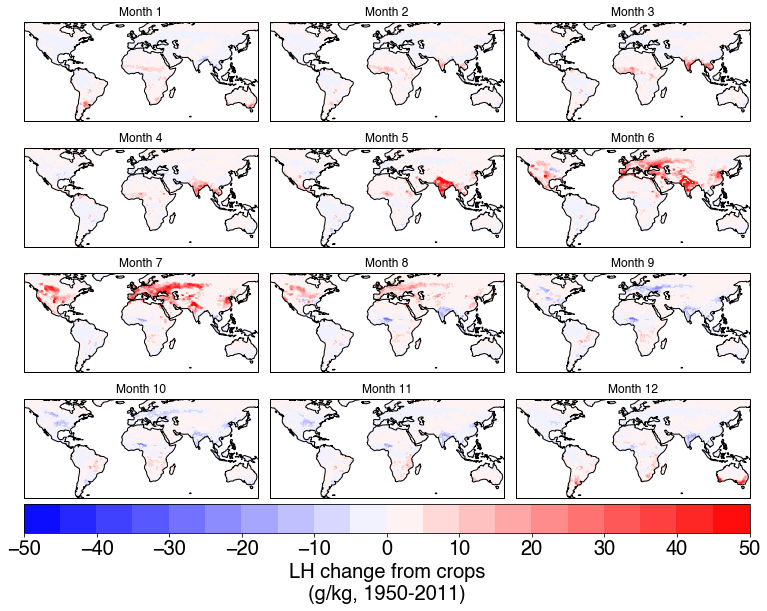

In [56]:
fig = plt.figure(figsize=(13,11))
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.05, hspace=0)

m = 0
for row in range(4):
    for col in range(3):
        ax = fig.add_subplot(gs[row, col], projection=ccrs.PlateCarree())
        ax.set_extent([-140, 155, -55, 70], crs=ccrs.PlateCarree())
        ax.coastlines()

        data, plot_lon_vals = cartopy.util.add_cyclic_point(np.nanmean(lh_grid_hist[:,:,:,m], axis=2) - \
                                                    np.nanmean(lh_grid_hist_nocrop[:,:,:,m], axis=2),\
                                                    coord=lon_vals)
        
        n=1
        v1 = -50/n
        v2 = 50.01/n
        vstep = 5/n
        vlabelstep = 10/n

        midnorm = MidpointNormalize(vmin=v1, vcenter=0, vmax=v2)
        cmap = plt.cm.get_cmap('bwr')
        c = ax.contourf(plot_lon_vals, lat_vals, data, \
                         cmap=cmap, norm=midnorm, levels=np.arange(v1,v2,vstep), transform=ccrs.PlateCarree())

        # plt.contourf(lon, lat, gddTrendSig, levels=[0, 0.05], colors='none', hatches=['/', ''])
        # ax.add_feature(cartopy.feature.STATES.with_scale('10m'), edgecolor='#222222')
        scmap = plt.cm.ScalarMappable(cmap=cmap, norm=midnorm)
        scmap.set_array([])
        
        ax.set_title('Month %d'%(m+1))
#         ax.set_aspect('auto')
        m += 1

# cax, kw = mpl.colorbar.make_axes()
# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation="horizontal", ticks = np.arange(6), pad=0.05,, extend="max")

cb = fig.colorbar(scmap, ax=plt.gcf().get_axes(), ticks=np.arange(v1, v2, vlabelstep), 
             boundaries=np.arange(v1, v2, vstep), orientation='horizontal', use_gridspec=True,
             pad=0.01, aspect=25, shrink=1)
cb.ax.tick_params(labelsize=20)
cb.set_label('LH change from crops\n(g/kg, 1950-2011)', fontsize=20)

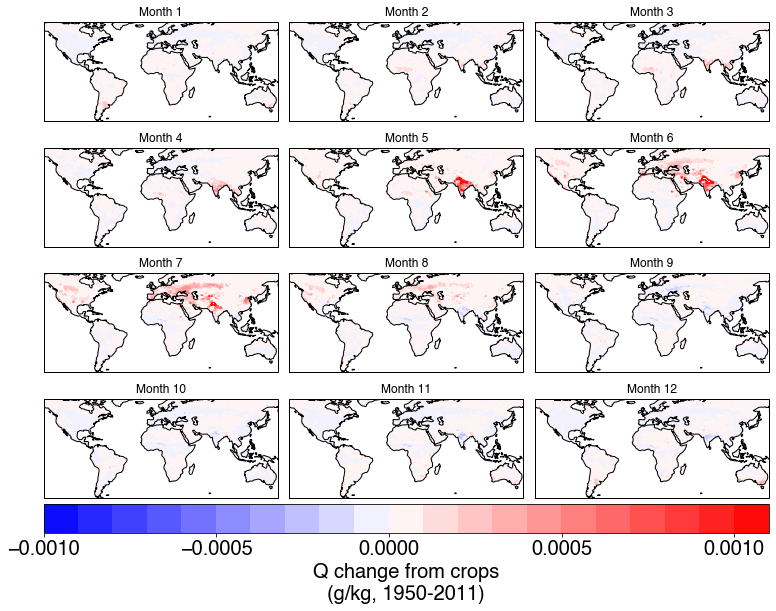

In [13]:
fig = plt.figure(figsize=(13,11))
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.05, hspace=0)

m = 0
for row in range(4):
    for col in range(3):
        ax = fig.add_subplot(gs[row, col], projection=ccrs.PlateCarree())
        ax.set_extent([-140, 155, -55, 70], crs=ccrs.PlateCarree())
        ax.coastlines()

        data, plot_lon_vals = cartopy.util.add_cyclic_point(np.nanmean(q2m_grid_hist[:,:,:,m], axis=2) - \
                                                    np.nanmean(q2m_grid_hist_nocrop[:,:,:,m], axis=2),\
                                                    coord=lon_vals)
        
        v1 = -.001
        v2 = .0011
        vstep = .0001
        vlabelstep = .0005

        midnorm = MidpointNormalize(vmin=v1, vcenter=0, vmax=v2)
        cmap = plt.cm.get_cmap('bwr')
        c = ax.contourf(plot_lon_vals, lat_vals, data, \
                         cmap=cmap, norm=midnorm, levels=np.arange(v1,v2,vstep), transform=ccrs.PlateCarree())

        # plt.contourf(lon, lat, gddTrendSig, levels=[0, 0.05], colors='none', hatches=['/', ''])
        # ax.add_feature(cartopy.feature.STATES.with_scale('10m'), edgecolor='#222222')
        scmap = plt.cm.ScalarMappable(cmap=cmap, norm=midnorm)
        scmap.set_array([])
        
        ax.set_title('Month %d'%(m+1))
#         ax.set_aspect('auto')
        m += 1

# cax, kw = mpl.colorbar.make_axes()
# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation="horizontal", ticks = np.arange(6), pad=0.05,, extend="max")

cb = fig.colorbar(scmap, ax=plt.gcf().get_axes(), ticks=np.arange(v1, v2, vlabelstep), 
             boundaries=np.arange(v1, v2, vstep), orientation='horizontal', use_gridspec=True,
             pad=0.01, aspect=25, shrink=1)
cb.ax.tick_params(labelsize=20)
cb.set_label('Q change from crops\n(g/kg, 1950-2011)', fontsize=20)

/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


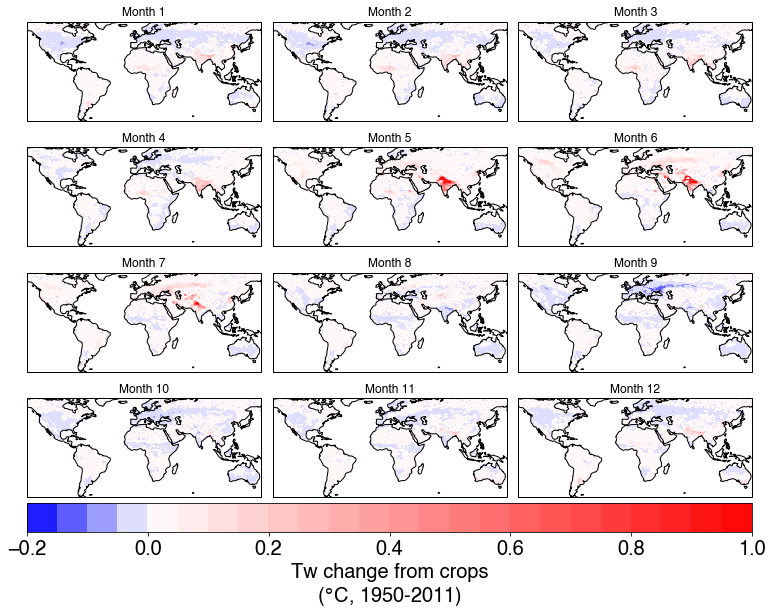

In [17]:
fig = plt.figure(figsize=(13,11))
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.05, hspace=0)

m = 0
for row in range(4):
    for col in range(3):
        ax = fig.add_subplot(gs[row, col], projection=ccrs.PlateCarree())
        ax.set_extent([-140, 155, -55, 70], crs=ccrs.PlateCarree())
        ax.coastlines()

        data, plot_lon_vals = cartopy.util.add_cyclic_point(np.nanmean(tw_grid_hist[:,:,:,m], axis=2) - \
                                                    np.nanmean(tw_grid_hist_nocrop[:,:,:,m], axis=2),\
                                                    coord=lon_vals)
        
        v1 = -.2
        v2 = 1.01
        vstep = .05
        vlabelstep = .2

        midnorm = MidpointNormalize(vmin=v1, vcenter=0, vmax=v2)
        cmap = plt.cm.get_cmap('bwr')
        c = ax.contourf(plot_lon_vals, lat_vals, data, \
                         cmap=cmap, norm=midnorm, levels=np.arange(v1,v2,vstep), transform=ccrs.PlateCarree())

        # plt.contourf(lon, lat, gddTrendSig, levels=[0, 0.05], colors='none', hatches=['/', ''])
        # ax.add_feature(cartopy.feature.STATES.with_scale('10m'), edgecolor='#222222')
        scmap = plt.cm.ScalarMappable(cmap=cmap, norm=midnorm)
        scmap.set_array([])
        
        ax.set_title('Month %d'%(m+1))
#         ax.set_aspect('auto')
        m += 1

# cax, kw = mpl.colorbar.make_axes()
# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation="horizontal", ticks = np.arange(6), pad=0.05,, extend="max")

cb = fig.colorbar(scmap, ax=plt.gcf().get_axes(), ticks=np.arange(v1, v2, vlabelstep), 
             boundaries=np.arange(v1, v2, vstep), orientation='horizontal', use_gridspec=True,
             pad=0.01, aspect=25, shrink=1)
cb.ax.tick_params(labelsize=20)
cb.set_label('Tw change from crops\n($\degree$C, 1950-2011)', fontsize=20)

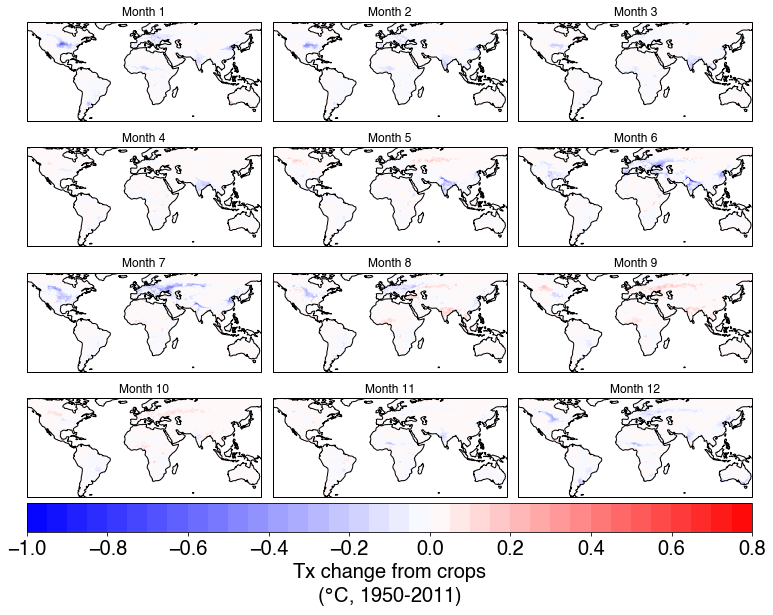

In [21]:
fig = plt.figure(figsize=(13,11))
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.05, hspace=0)

m = 0
for row in range(4):
    for col in range(3):
        ax = fig.add_subplot(gs[row, col], projection=ccrs.PlateCarree())
        ax.set_extent([-140, 155, -55, 70], crs=ccrs.PlateCarree())
        ax.coastlines()

        data, plot_lon_vals = cartopy.util.add_cyclic_point(np.nanmean(tx_grid_hist[:,:,:,m], axis=2) - \
                                                    np.nanmean(tx_grid_hist_nocrop[:,:,:,m], axis=2),\
                                                    coord=lon_vals)
        
        v1 = -1
        v2 = .81
        vstep = .05
        vlabelstep = .2

        midnorm = MidpointNormalize(vmin=v1, vcenter=0, vmax=v2)
        cmap = plt.cm.get_cmap('bwr')
        c = ax.contourf(plot_lon_vals, lat_vals, data, \
                         cmap=cmap, norm=midnorm, levels=np.arange(v1,v2,vstep), transform=ccrs.PlateCarree())

        # plt.contourf(lon, lat, gddTrendSig, levels=[0, 0.05], colors='none', hatches=['/', ''])
        # ax.add_feature(cartopy.feature.STATES.with_scale('10m'), edgecolor='#222222')
        scmap = plt.cm.ScalarMappable(cmap=cmap, norm=midnorm)
        scmap.set_array([])
        
        ax.set_title('Month %d'%(m+1))
#         ax.set_aspect('auto')
        m += 1

# cax, kw = mpl.colorbar.make_axes()
# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation="horizontal", ticks = np.arange(6), pad=0.05,, extend="max")

cb = fig.colorbar(scmap, ax=plt.gcf().get_axes(), ticks=np.arange(v1, v2, vlabelstep), 
             boundaries=np.arange(v1, v2, vstep), orientation='horizontal', use_gridspec=True,
             pad=0.01, aspect=25, shrink=1)
cb.ax.tick_params(labelsize=20)
cb.set_label('Tx change from crops\n($\degree$C, 1950-2011)', fontsize=20)

/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


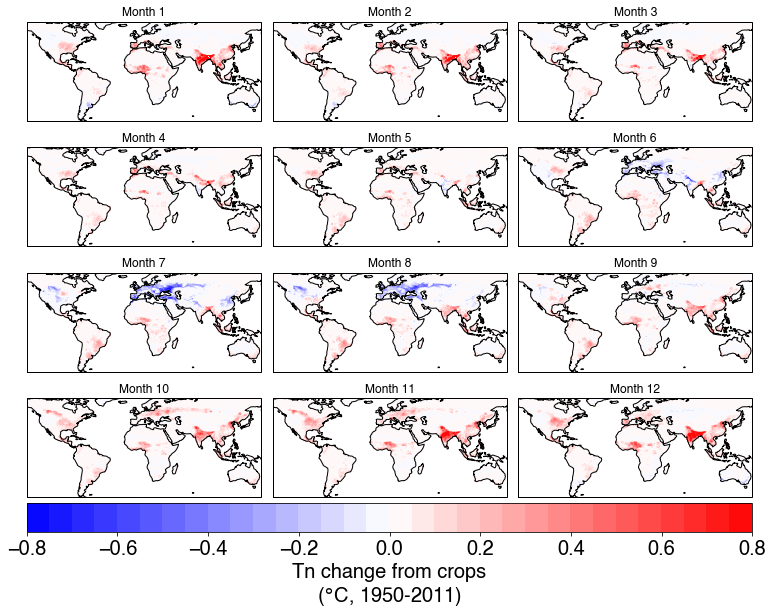

In [11]:
fig = plt.figure(figsize=(13,11))
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.05, hspace=0)

m = 0
for row in range(4):
    for col in range(3):
        ax = fig.add_subplot(gs[row, col], projection=ccrs.PlateCarree())
        ax.set_extent([-140, 155, -55, 70], crs=ccrs.PlateCarree())
        ax.coastlines()

        data, plot_lon_vals = cartopy.util.add_cyclic_point(np.nanmean(tn_grid_hist[:,:,:,m], axis=2) - \
                                                    np.nanmean(tn_grid_hist_nocrop[:,:,:,m], axis=2),\
                                                    coord=lon_vals)
        
        v1 = -.8
        v2 = .81
        vstep = .05
        vlabelstep = .2

        midnorm = MidpointNormalize(vmin=v1, vcenter=0, vmax=v2)
        cmap = plt.cm.get_cmap('bwr')
        c = ax.contourf(plot_lon_vals, lat_vals, data, \
                         cmap=cmap, norm=midnorm, levels=np.arange(v1,v2,vstep), transform=ccrs.PlateCarree())

        # plt.contourf(lon, lat, gddTrendSig, levels=[0, 0.05], colors='none', hatches=['/', ''])
        # ax.add_feature(cartopy.feature.STATES.with_scale('10m'), edgecolor='#222222')
        scmap = plt.cm.ScalarMappable(cmap=cmap, norm=midnorm)
        scmap.set_array([])
        
        ax.set_title('Month %d'%(m+1))
#         ax.set_aspect('auto')
        m += 1

# cax, kw = mpl.colorbar.make_axes()
# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation="horizontal", ticks = np.arange(6), pad=0.05,, extend="max")

cb = fig.colorbar(scmap, ax=plt.gcf().get_axes(), ticks=np.arange(v1, v2, vlabelstep), 
             boundaries=np.arange(v1, v2, vstep), orientation='horizontal', use_gridspec=True,
             pad=0.01, aspect=25, shrink=1)
cb.ax.tick_params(labelsize=20)
cb.set_label('Tn change from crops\n($\degree$C, 1950-2011)', fontsize=20)

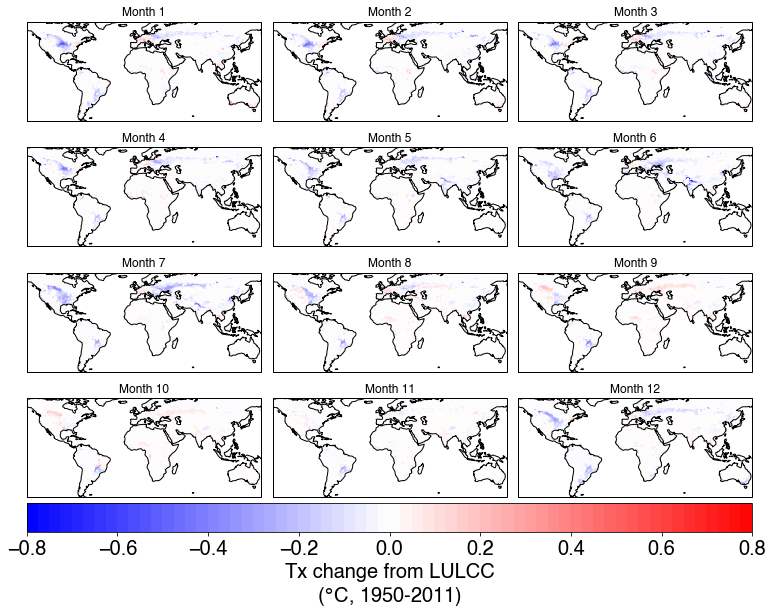

In [59]:
fig = plt.figure(figsize=(13,11))
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.05, hspace=0)

m = 0
for row in range(4):
    for col in range(3):
        ax = fig.add_subplot(gs[row, col], projection=ccrs.PlateCarree())
        ax.set_extent([-140, 155, -55, 70], crs=ccrs.PlateCarree())
        ax.coastlines()

        data, plot_lon_vals = cartopy.util.add_cyclic_point(np.nanmean(tx_grid_hist[:,:,:,m], axis=2) - \
                                                    np.nanmean(tx_grid_hist_nolulcc[:,:,:,m], axis=2),\
                                                    coord=lon_vals)
        
        v1 = -.8
        v2 = .81
        vstep = .025
        vlabelstep = .2

        midnorm = MidpointNormalize(vmin=v1, vcenter=0, vmax=v2)
        cmap = plt.cm.get_cmap('bwr')
        c = ax.contourf(plot_lon_vals, lat_vals, data, \
                         cmap=cmap, norm=midnorm, levels=np.arange(v1,v2,vstep), transform=ccrs.PlateCarree())

        # plt.contourf(lon, lat, gddTrendSig, levels=[0, 0.05], colors='none', hatches=['/', ''])
        # ax.add_feature(cartopy.feature.STATES.with_scale('10m'), edgecolor='#222222')
        scmap = plt.cm.ScalarMappable(cmap=cmap, norm=midnorm)
        scmap.set_array([])
        
        ax.set_title('Month %d'%(m+1))
#         ax.set_aspect('auto')
        m += 1

# cax, kw = mpl.colorbar.make_axes()
# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation="horizontal", ticks = np.arange(6), pad=0.05,, extend="max")

cb = fig.colorbar(scmap, ax=plt.gcf().get_axes(), ticks=np.arange(v1, v2, vlabelstep), 
             boundaries=np.arange(v1, v2, vstep), orientation='horizontal', use_gridspec=True,
             pad=0.01, aspect=25, shrink=1)
cb.ax.tick_params(labelsize=20)
cb.set_label('Tx change from LULCC\n($\degree$C, 1950-2011)', fontsize=20)

/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


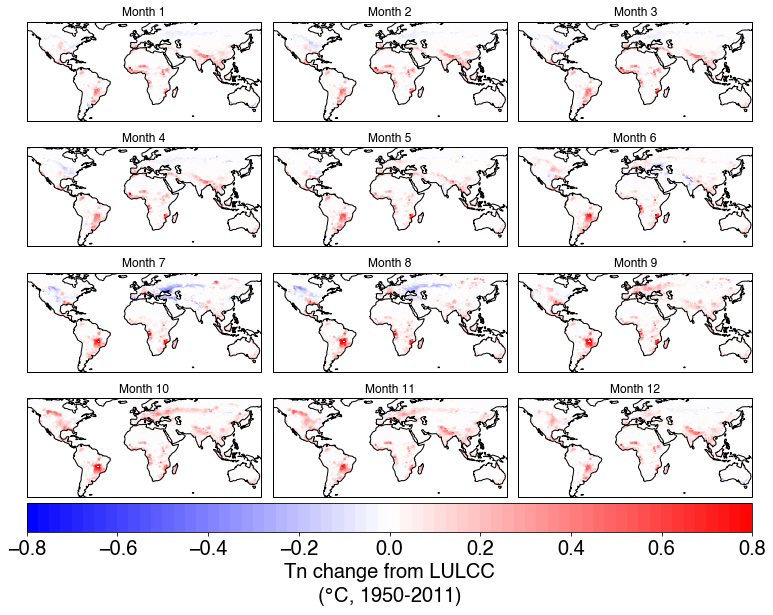

In [13]:
fig = plt.figure(figsize=(13,11))
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.05, hspace=0)

m = 0
for row in range(4):
    for col in range(3):
        ax = fig.add_subplot(gs[row, col], projection=ccrs.PlateCarree())
        ax.set_extent([-140, 155, -55, 70], crs=ccrs.PlateCarree())
        ax.coastlines()

        data, plot_lon_vals = cartopy.util.add_cyclic_point(np.nanmean(tn_grid_hist[:,:,:,m], axis=2) - \
                                                    np.nanmean(tn_grid_hist_nolulcc[:,:,:,m], axis=2),\
                                                    coord=lon_vals)
        
        v1 = -.8
        v2 = .81
        vstep = .025
        vlabelstep = .2

        midnorm = MidpointNormalize(vmin=v1, vcenter=0, vmax=v2)
        cmap = plt.cm.get_cmap('bwr')
        c = ax.contourf(plot_lon_vals, lat_vals, data, \
                         cmap=cmap, norm=midnorm, levels=np.arange(v1,v2,vstep), transform=ccrs.PlateCarree())

        # plt.contourf(lon, lat, gddTrendSig, levels=[0, 0.05], colors='none', hatches=['/', ''])
        # ax.add_feature(cartopy.feature.STATES.with_scale('10m'), edgecolor='#222222')
        scmap = plt.cm.ScalarMappable(cmap=cmap, norm=midnorm)
        scmap.set_array([])
        
        ax.set_title('Month %d'%(m+1))
#         ax.set_aspect('auto')
        m += 1

# cax, kw = mpl.colorbar.make_axes()
# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation="horizontal", ticks = np.arange(6), pad=0.05,, extend="max")

cb = fig.colorbar(scmap, ax=plt.gcf().get_axes(), ticks=np.arange(v1, v2, vlabelstep), 
             boundaries=np.arange(v1, v2, vstep), orientation='horizontal', use_gridspec=True,
             pad=0.01, aspect=25, shrink=1)
cb.ax.tick_params(labelsize=20)
cb.set_label('Tn change from LULCC\n($\degree$C, 1950-2011)', fontsize=20)